預訓練完成
3 維
已訓練  10000  次
 1_再訓練 2_取得最短路徑 3_展示 Q table  4_重新訓練 5_離開
==================== 訓練 10000 次 q_table ====================


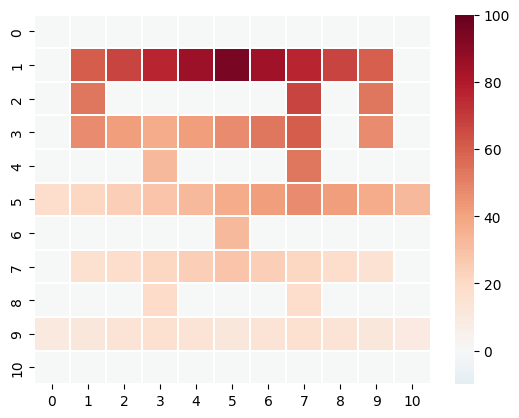

已訓練  10000  次
 1_再訓練 2_取得最短路徑 3_展示 Q table  4_重新訓練 5_離開
預訓練完成
3 維
已訓練  1000  次
 1_再訓練 2_取得最短路徑 3_展示 Q table  4_重新訓練 5_離開
==================== 訓練 1000 次 q_table =====================


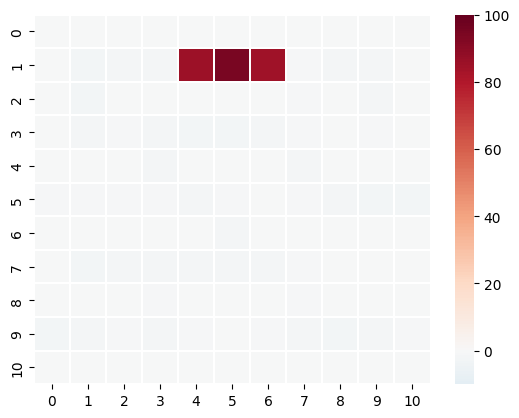

已訓練  1000  次
 1_再訓練 2_取得最短路徑 3_展示 Q table  4_重新訓練 5_離開
預訓練完成
3 維
已訓練  10000  次
 1_再訓練 2_取得最短路徑 3_展示 Q table  4_重新訓練 5_離開
==================== 訓練 10000 次 q_table ====================


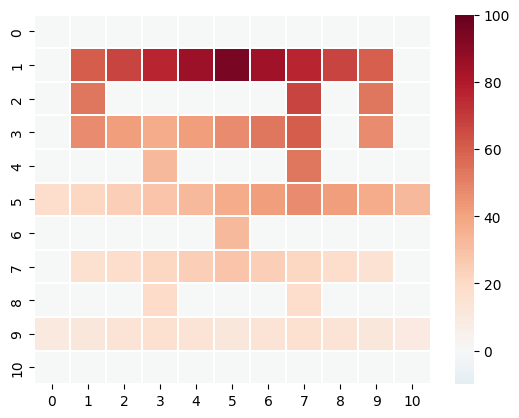

已訓練  10000  次
 1_再訓練 2_取得最短路徑 3_展示 Q table  4_重新訓練 5_離開


In [3]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns

#係數建立區

base_columns = 11
base_rows = 11

#獨立功能塊 Start

#列印table fuction

def print_title(name,n_st = " " ):
    n_st = str(n_st)
    if n_st == " ":
        name =" "+name+" "
    else:
        name =" 訓練 "+n_st+" 次 "+name+" "
    print(name.center(60,"="))

#圖像化Q_label功能(熱點圖)start

#Q_table 三維矩陣依最大值轉換成二維後依熱力圖成像

def q_table_max_pain(q_table ,base_rows,base_columns,n_st):
    max_q_table = np.zeros((base_rows,base_columns))
    for x in range (0,base_rows):

        for y in range (0,base_columns):
            max_q = np.argmax(q_table[x,y])
            max_q_value= q_table[x,y,max_q]
            max_q_table[x,y] = max_q_value
            #print(x,"  ",y,"  ",max_q,max_q_table[x,y])
    print_title("q_table",n_st)
    ax = sns.heatmap(max_q_table,vmax=100,vmin= -10,cmap = "RdBu_r",linewidths= 0.3 ,center = 0)
    plt.plot()
    plt.show()
#圖像化Q_label功能(熱點圖)END


#獨立功能塊 end

#(二-1)初始化 table fuction 地圖及Q_table

def init_table():
    #base table create
    base_table = np.full((base_rows, base_columns), -100)
    base_table[0,5] = 100
    for i in range(0, 11):
        base_table[5, i] = -1
        base_table[9, i] = -1
    for i in range(1, 10):
        base_table[1, i] = -1
        base_table[7, i] = -1
    for i in range(1, 8):
        base_table[3, i] = -1    
    base_table[2,1] = -1
    base_table[2,7] = -1
    base_table[2,9] = -1
    base_table[3,9] = -1
    base_table[4,3] = -1
    base_table[4,7] = -1
    base_table[6,5] = -1
    base_table[8,3] = -1
    base_table[8,7] = -1
    #Q-values table create
    q_table = np.zeros((base_rows, base_columns ,4))
    return base_table, q_table

#(二-2)初始位置

def random_start(base_table):
    output = 0
    while output == 0:
        t_x = np.random.randint(0,11)
        t_y = np.random.randint(0,11)
        z = base_table[t_x,t_y]
        if z == -1 :
            return t_x,t_y
            output = 1
        else :
            continue

#(二-3)start

#是否嘗試新路線 輸出 0 為是；輸出 1 為否
def try_new_action(try_tast):
    action = rd.uniform(0,1)
    if action < try_tast:
        return 1
    else:
        return 0

#隨機移動方向 0上 1右 2下 3左

def random_direction():
    t_direction = np.random.randint(0,4)
    return t_direction

#(二-3) end 決定t時的方向
def get_t_direction(q_table,t_x,t_y,try_tast = 0.1):
    try_new_action_value = try_new_action(try_tast)
    if try_new_action_value == 0:
        t_direction = random_direction()
    elif try_new_action_value == 1:
        t_direction = np.argmax(q_table[t_x,t_y])
    else:
        print("get_t_direction error")
    return t_direction

#t位置改變至t+1
#輸入t時xy座標
#輸出t+1時xy 座標為 t_add_x,t_add_y

def t_add_loadcation(t_x,t_y,t_direction):
    limit_x = 10

    if t_direction == 0 and t_y >= 1: 
        t_y = t_y - 1
    elif t_direction == 1 and t_x <=9:
        t_x = t_x + 1

    elif t_direction == 2 and t_y<=9:
        t_y = t_y + 1
    elif t_direction == 3 and t_x >= 1:
        t_x = t_x - 1
    else:
        t_x = t_x
        t_y = t_y
    return t_x,t_y
    

    
#計算分數及分數更新
# 1.reward = t+1 reward  
# 2.new_max_fraction = t+1 所有方向中最高state值
# 3.t_direction = t 過來的方向的Q_value值
# 4.attenuation = 衰減率 (預設0.9)
# 5.study = 學習率 (預設0.9)
# 6.輸出為 new_q_direction 為t位置時往t+1方向，新的Q值
# 7.更新Qtable值

def q_value_calculate(base_table,q_table,t_x,t_y,t_add_x,t_add_y, t_direction , attenuation = 0.95 , study = 0.95):
    
    reward = base_table[t_add_x,t_add_y]
    new_max_fraction = np.argmax(q_table[t_add_x,t_add_y])
    t_add_max_q = q_table[t_add_x,t_add_y,new_max_fraction]

    td = reward + (attenuation*t_add_max_q) - t_direction
    new_q_direction = (td * study) + t_direction

    q_table[t_x,t_y,t_direction] = new_q_direction
    return q_table


def train_q(train ,base_table,q_table):
    train_n = 0
    while train_n < train :
        train_t = 1
        t_x , t_y = random_start(base_table)
        while train_t == 1 :
            t_direction = get_t_direction(base_table,t_x,t_y)
            t_add_x,t_add_y = t_add_loadcation(t_x,t_y,t_direction)
            q_table = q_value_calculate(base_table,q_table,t_x,t_y,t_add_x,t_add_y, t_direction)
            
            t_x = t_add_x
            t_y = t_add_y
            if base_table[t_add_x,t_add_y] == -100 or 100 :
                train_t = 0
                train_n = train_n + 1
                break
            else :
                continue
    else :
        return q_table



#運行區

start_value = 1 
while start_value == 1:
    base_table , q_table = init_table()
    all_train = 0
    train = int(input("輸入預訓練次數: "))
    q_table = train_q(train,base_table,q_table)
    all_train = train
    print("預訓練完成")
    print(q_table.ndim,"維")

    command_value = 1
    while command_value == 1:
        print("已訓練 ",all_train," 次")
        print(" 1_再訓練 2_取得最短路徑 3_展示 Q table  4_重新訓練 5_離開")
        command_table = [1,2,3,4,5]
        command = int(input("請輸入數字: "))

        if command not in command_table:
            print("輸入錯誤")
            continue
        elif command == 1:
            train = int(input("輸入再訓練次數: "))
            q_table = train_q(train,base_table,q_table)
            all_train = all_train + train
            print("再訓練完成")
            continue
        elif command == 2:
            print("未完成")
            continue
        elif command == 3:
            q_table_max_pain(q_table,base_rows,base_columns,all_train)
            continue
        elif command == 4:
            command_value = 0
            break
        elif command == 5:
            command_value = 0
            start_value = 0
        else :
            continue


<Axes: >

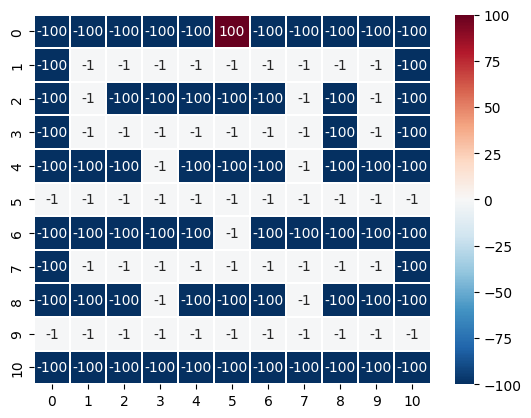

In [4]:
sns.heatmap(base_table,vmax=100,vmin= -100,cmap = "RdBu_r",fmt= "d",annot= True ,linewidths= 0.3 ,center = 0)